In [108]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
import json
from datetime import datetime

In [124]:
def parse_filepath(datadir, name):
    return os.path.join(datadir, name + '_scenarios.h5')

def get_history_data(datadir, name):
    data = []
    file_path = os.path.join(datadir, name + '_scenarios.h5')
    with h5py.File(file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        for key in keys:
            data.append(h5_file[key][0, 0])
    return data

# Extract mean
def get_uc_h1_mean_data(datadir, name):
    data = []
    file_path = os.path.join(datadir, name + '_scenarios.h5')
    with h5py.File(file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        for key in keys:
            data.append(np.mean(h5_file[key][1:, 1])) # take the mean for 11 scenarios 
    return data

# Extract all scenarios
def get_uc_h1_fcst_data(datadir, name):
    data = []
    file_path = os.path.join(datadir, name + '_scenarios.h5')
    with h5py.File(file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        for key in keys:
            data.append(h5_file[key][1:, 1]) # Extract all scenarios 
    return data

def get_time_idx(datadir, name):
    file_path = os.path.join(datadir, name + '_scenarios.h5')
    with h5py.File(file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
    return keys

## Compare hour and minute 5 data

In [122]:
datadir = "/Users/hanshu/Desktop/Price_formation/Data/time_series"
# file_suffix = "min5" if min5_flag else "hourly"
# solar_file = joinpath(ts_dir, "solar_scenarios_multi_" * file_suffix * ".h5")
# wind_file = joinpath(ts_dir, "wind_scenarios_multi_" * file_suffix * ".h5")
# load_file = joinpath(ts_dir, "load_scenarios" * file_suffix * ".h5")

min_load = get_history_data(mindatadir, 'load')
min_wind = get_history_data(mindatadir, 'wind')
min_solar = get_history_data(mindatadir, 'solar')
min_idx = get_time_idx(mindatadir, 'load')
min_df = pd.DataFrame({'time': min_idx, 'load': min_load, 'wind': min_wind, 'solar': min_solar})
min_df['time'] = pd.to_datetime(min_df['time'])



# uc_h1_mean_load = get_uc_h1_mean_data(datadir, 'load')
# uc_h1_mean_wind = get_uc_h1_mean_data(datadir, 'wind')
# uc_h1_mean_solar = get_uc_h1_mean_data(datadir, 'solar')
# h1_idx = get_time_idx(datadir, 'load')
# h1_df = pd.DataFrame({'time': h1_idx, 'load': uc_h1_mean_load, 'wind': uc_h1_mean_wind, 'solar': uc_h1_mean_solar})
# h1_df['time'] = pd.to_datetime(h1_df['time'])



In [128]:
datadir = '/Users/hanshu/Desktop/Price_formation/Data/time_series/NYISO_Hour'
load_fcst = get_uc_h1_fcst_data(datadir, 'load')
load_fcst_df = pd.DataFrame(load_fcst, columns=[f'scenario_{i}' for i in range(1,12)])
time_index = get_time_idx(datadir, 'load')
load_fcst_df['time'] = time_index
load_fcst_df['time'] = pd.to_datetime(load_fcst_df['time'])

In [129]:
forecast_error = [[] for _ in range(11)]
for i in range(len(load_fcst_df)):
    select = min_df[(min_df.time >= load_fcst_df.time[i]) & (min_df.time < load_fcst_df.time[i] + pd.Timedelta(hours=1))]
    for s in range(11):
        forecast_error[s].append(load_fcst_df[f'scenario_{s+1}'][i] - select.load.mean())

In [133]:
load_fcst_error_df = pd.DataFrame(forecast_error).T
load_fcst_error_df.columns = [f'scenario_{i}' for i in range(1,12)]
load_fcst_error_df['time'] = time_index
load_fcst_error_df['time'] = pd.to_datetime(load_fcst_error_df['time'])

In [140]:
aug_load_fcst_error_df = load_fcst_error_df[(load_fcst_error_df.time >= datetime(2019, 8, 1)) & (load_fcst_error_df.time < datetime(2019, 9, 1))]
aug_load_fcst_error_df

,scenario_1,scenario_2,scenario_3,scenario_4,scenario_5,scenario_6,scenario_7,scenario_8,scenario_9,scenario_10,scenario_11,time
5091,1856.917260,707.822918,1932.295418,5194.449236,2983.583238,1502.361417,1769.072780,1210.968783,705.610272,1891.414711,1238.637498,2019-08-01 00:00:00
5092,1052.548772,1786.625190,2643.296542,5079.222732,1690.085225,943.948046,1169.490000,2106.538257,1865.293582,695.246944,1362.861185,2019-08-01 01:00:00
5093,1723.623154,660.683426,608.681179,2474.021319,3219.491890,2206.162605,373.368610,579.397229,2018.217153,889.292165,781.872111,2019-08-01 02:00:00
5094,1065.054469,1375.819714,985.905637,910.075408,587.325942,1699.262265,1154.747122,-370.213884,532.496398,794.538659,1526.728364,2019-08-01 03:00:00
5095,31.092583,801.868466,873.328547,551.334996,1834.267930,555.222089,1299.001592,181.494428,493.095898,1159.873367,452.071529,2019-08-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5830,308.351447,2936.820629,679.909184,3434.258941,448.726889,-1218.780653,1528.483994,3295.199557,-1384.061745,-439.982354,3404.093134,2019-08-31 19:00:00
5831,639.896134,655.047495,1250.189288,-218.531177,2202.810252,2528.487920,-78.111003,2679.880504,1187.555628,360.376246,1671.748574,2019-08-31 20:00:00
5832,-273.265956,1333.041531,1704.889100,112.702401,2034.261364,1676.491367,1293.858530,787.878830,1389.738272,1531.946004,1037.716496,2019-08-31 21:00:00
5833,3972.395268,2199.344244,3972.395268,1776.629216,676.423823,543.049376,1729.712923,1359.355387,1938.250243,773.427412,1140.831487,2019-08-31 22:00:00


In [135]:
july_load_fcst_error_df = load_fcst_error_df[(load_fcst_error_df.time >= datetime(2019, 7, 1)) & (load_fcst_error_df.time < datetime(2019, 8, 1))]
july_load_fcst_error_df
july_h1_df

,scenario_1,scenario_2,scenario_3,scenario_4,scenario_5,scenario_6,scenario_7,scenario_8,scenario_9,scenario_10,scenario_11,time
4347,1205.912863,2552.445674,2610.549037,1487.840639,3249.287138,2072.655820,3482.077125,2249.533445,1225.529205,2491.515687,2026.945380,2019-07-01 00:00:00
4348,373.979301,1919.339478,3025.759457,640.027765,1748.281723,2140.580018,4317.024374,1320.972794,2146.862608,1483.359514,2379.051968,2019-07-01 01:00:00
4349,-229.600951,-1365.433656,-683.732199,-970.401749,-80.218355,-183.016409,-1101.871373,-789.826803,1118.813597,341.776303,331.216998,2019-07-01 02:00:00
4350,-435.412973,-663.585673,-277.312730,-276.263993,-253.169777,-1571.379924,-507.461180,-49.288065,604.620093,-379.408669,-1040.721505,2019-07-01 03:00:00
4351,-632.703263,-164.492049,-564.132094,-622.813658,-120.018828,561.327075,852.077720,-615.655863,271.339558,-588.080074,259.331402,2019-07-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5086,1625.908760,1525.744259,2870.029010,2396.371881,989.921181,2700.320422,4138.352917,1554.314143,2659.619414,1292.465182,1587.125408,2019-07-31 19:00:00
5087,712.347374,906.807665,204.758964,3556.476630,1221.289794,3836.791951,1501.624175,4058.274264,3320.812993,6096.425345,1820.646343,2019-07-31 20:00:00
5088,74.202190,3016.265725,-909.703115,1531.016230,3283.946470,1770.967467,2240.821774,-96.664707,704.711176,1717.561229,-419.035253,2019-07-31 21:00:00
5089,3412.503945,2597.674670,3419.800750,-920.552830,94.151791,545.975704,3614.758453,668.299172,1543.558059,-1338.493970,-4370.736592,2019-07-31 22:00:00


In [139]:
merge_df = pd.merge(july_h1_df, july_load_fcst_error_df, on='time')
merge_df.sort_values(by='difference')

,time,load,wind,solar,net_load,difference,scenario_1,scenario_2,scenario_3,scenario_4,scenario_5,scenario_6,scenario_7,scenario_8,scenario_9,scenario_10,scenario_11
475,2019-07-20 19:00:00,22652.790155,1462.182113,19.543219,21171.064822,-6885.924163,-6995.369543,-7985.804500,-4363.907586,-8056.038360,-6264.711146,-5367.782654,-7340.548409,-5902.240850,-7945.714007,-7153.204256,-8477.026862
232,2019-07-10 16:00:00,21739.460792,18.014645,227.571610,21493.874537,-6459.562834,-6956.490991,-5881.291780,-2945.177783,-9893.910440,-8963.895798,-8436.497725,-7123.933286,-9275.722241,-8775.458721,-2064.708962,-1365.026178
471,2019-07-20 15:00:00,23832.242559,1270.181665,254.588980,22307.471913,-6342.984999,-4475.514735,-5962.775092,-4752.750609,-5500.398123,-4530.002896,-6772.424025,-8178.161193,-5790.287340,-7850.202876,-8971.002895,-6008.177303
233,2019-07-10 17:00:00,22334.490872,0.000000,173.180071,22161.310801,-6221.866261,-2348.762562,-7361.039697,-1515.704935,-4917.481060,-6926.692519,-7357.335033,-8237.408197,-3505.067881,-9170.137583,-9095.086059,-8474.612744
467,2019-07-20 11:00:00,22185.172138,640.494142,303.600646,21241.077349,-6181.739616,-7214.107229,-6033.665981,-7168.133677,-6111.114696,-6002.674350,-3824.965806,-6246.778155,-7724.566355,-6488.243905,-4350.473125,-4590.103086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2019-07-08 13:00:00,25337.874180,19.882567,340.491693,24977.499921,3409.543601,-391.022348,1380.310237,2991.825023,5449.552332,1280.967740,7527.681382,2784.383287,5538.985130,1498.837038,5220.836750,3948.876433
540,2019-07-23 12:00:00,25904.359320,123.895207,280.054252,25500.409861,3820.886558,3590.718191,1277.654400,5665.213438,2069.077635,2450.032161,6172.140506,3768.941366,6927.001323,1284.863184,4821.481636,3128.381902
542,2019-07-23 14:00:00,26802.655909,223.204159,290.854784,26288.596966,4170.465487,6151.070602,2749.016110,1509.306168,4256.498269,2913.978069,2898.696977,6947.580165,3052.177644,4666.942258,7153.180749,3927.006434
541,2019-07-23 13:00:00,26675.708723,225.409272,288.390666,26161.908785,4284.055591,3084.437660,6093.002932,2685.102524,2471.395898,4037.079429,2634.113571,1439.685589,7207.017527,4163.778137,6729.492377,6593.472206


In [112]:
forecast_error = []
for i in range(len(h1_df)):
    select = min_df[(min_df.time >= h1_df.time[i]) & (min_df.time < h1_df.time[i] + pd.Timedelta(hours=1))]
    forecast_error.append(h1_df.net_load[i] - select.net_load.mean())
h1_df['FsctError'] = forecast_error


## Check PERFORM quantiles

In [143]:
load_quantile_file = '/Users/hanshu/Desktop/Price_formation/DataSource/ARPAE_NYISO/Clean_CSV/Hour/load_forecast_2019_hourly_BA.csv'
load_quantile_df = pd.read_csv(load_quantile_file)
load_quantile_df['time'] = pd.to_datetime(load_quantile_df['LocalDateTime'])

In [144]:
load_quantile_df

,LocalDateTime,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x93,x94,x95,x96,x97,x98,x99,datetime,datetime_issue,time
0,2018-12-31T20:00:00.0,14270.2610,14910.6810,15317.007,15622.6710,15871.305,16082.931,16268.485,16434.627,16585.727,...,23202.678,23388.232,23599.860,23848.492,24154.156,24560.482,25200.902,2019-01-01T00:00:00.0,2018-12-29T18:00:00.0,2018-12-31 20:00:00
1,2018-12-31T21:00:00.0,13709.2180,14338.2940,14737.423,15037.6720,15281.900,15489.778,15672.046,15835.245,15983.669,...,22483.406,22665.674,22873.550,23117.780,23418.030,23817.158,24446.234,2019-01-01T01:00:00.0,2018-12-29T18:00:00.0,2018-12-31 21:00:00
2,2018-12-31T22:00:00.0,12832.5490,13462.6875,13862.490,14163.2460,14407.889,14616.117,14798.692,14962.168,15110.842,...,21621.560,21804.137,22012.365,22257.006,22557.762,22957.564,23587.705,2019-01-01T02:00:00.0,2018-12-29T18:00:00.0,2018-12-31 22:00:00
3,2018-12-31T23:00:00.0,13964.8270,14316.1080,14538.984,14706.6455,14843.025,14959.105,15060.886,15152.018,15234.897,...,18864.402,18966.182,19082.262,19218.643,19386.303,19609.180,19960.460,2019-01-01T03:00:00.0,2018-12-30T18:00:00.0,2018-12-31 23:00:00
4,2019-01-01T00:00:00.0,13132.9520,13466.8440,13678.688,13838.0500,13967.679,14078.013,14174.755,14261.375,14340.153,...,17789.994,17886.736,17997.070,18126.700,18286.060,18497.904,18831.797,2019-01-01T04:00:00.0,2018-12-30T18:00:00.0,2019-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31T15:00:00.0,14995.0625,15542.6720,15890.112,16151.4790,16364.080,16545.037,16703.701,16845.766,16974.967,...,22632.975,22791.639,22972.596,23185.197,23446.562,23794.004,24341.613,2019-12-31T19:00:00.0,2019-12-29T18:00:00.0,2019-12-31 15:00:00
8756,2019-12-31T16:00:00.0,15163.5350,15728.7900,16087.426,16357.2140,16576.666,16763.453,16927.229,17073.871,17207.236,...,23047.560,23211.336,23398.123,23617.576,23887.363,24246.000,24811.254,2019-12-31T20:00:00.0,2019-12-29T18:00:00.0,2019-12-31 16:00:00
8757,2019-12-31T17:00:00.0,16973.6250,17342.1660,17575.996,17751.8950,17894.977,18016.762,18123.543,18219.152,18306.105,...,22113.960,22220.742,22342.527,22485.607,22661.508,22895.336,23263.879,2019-12-31T21:00:00.0,2019-12-30T18:00:00.0,2019-12-31 17:00:00
8758,2019-12-31T18:00:00.0,17054.2290,17434.4400,17675.670,17857.1370,18004.748,18130.389,18240.549,18339.186,18428.893,...,22357.290,22467.451,22593.092,22740.701,22922.170,23163.400,23543.610,2019-12-31T22:00:00.0,2019-12-30T18:00:00.0,2019-12-31 18:00:00


In [168]:
# find the first index of nums that is greater than target
def binary_search(nums, target):
    lo, hi = 0, len(nums)
    while lo < hi:
        mid = (lo + hi)//2
        if nums[mid] < target:
            lo = mid + 1
        else:
            hi = mid
    return lo

quantile = []
for i in range(len(min_df)):
    select = load_quantile_df[(load_quantile_df.time <= min_df.time[i]) & (load_quantile_df.time + pd.Timedelta(hours=1) > min_df.time[i])]
    # find the quantile of min_df.load[i] in select
    nums = select.iloc[0, 1:100].tolist()
    q = binary_search(nums, min_df.load[i]) # q in [0, 98]
    quantile.append(q+1)


In [193]:
july_min_df = min_df[(min_df.time >= datetime(2019, 7, 1)) & (min_df.time < datetime(2019, 8, 1))]
aug_min_df = min_df[(min_df.time >= datetime(2019, 8, 1)) & (min_df.time < datetime(2019, 9, 1))]

In [196]:
july_min_df

,time,load,wind,solar,quantile
52176,2019-07-01 00:00:00,16908.699219,375.305291,0.0,20
52177,2019-07-01 00:05:00,16729.900391,360.729537,0.0,16
52178,2019-07-01 00:10:00,16739.000000,347.575179,0.0,16
52179,2019-07-01 00:15:00,16592.800781,334.853217,0.0,14
52180,2019-07-01 00:20:00,16468.599609,322.980669,0.0,12
...,...,...,...,...,...
61099,2019-07-31 23:35:00,20296.500000,264.720893,0.0,24
61100,2019-07-31 23:40:00,20224.699219,258.551051,0.0,22
61101,2019-07-31 23:45:00,20105.400391,252.470647,0.0,20
61102,2019-07-31 23:50:00,19944.699219,246.014020,0.0,18


Text(0.5, 1.0, 'Historical Load in July 2019 in PERFORM Quantile Distribution')

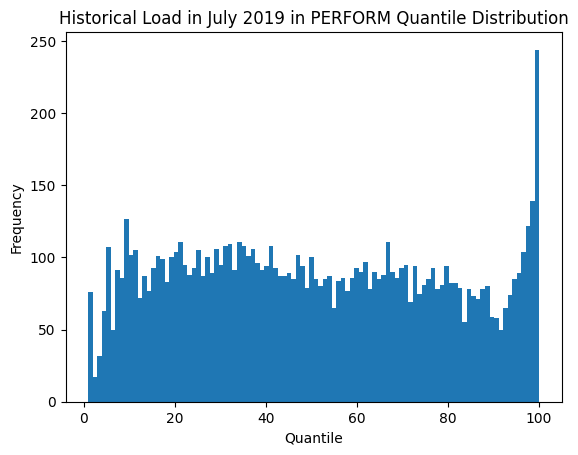

In [200]:
plt.hist(july_min_df['quantile'], bins = 100)
plt.xlabel('Quantile')
plt.ylabel('Frequency')
plt.title('Historical Load in July 2019 in PERFORM Quantile Distribution')

Text(0.5, 1.0, 'Historical Load in August 2019 in PERFORM Quantile Distribution')

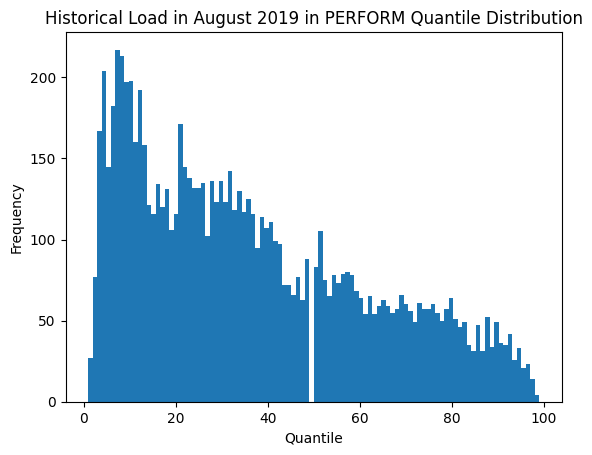

In [199]:
plt.hist(aug_min_df['quantile'], bins = 100)
plt.xlabel('Quantile')
plt.ylabel('Frequency')
plt.title('Historical Load in August 2019 in PERFORM Quantile Distribution')

In [186]:
min_df['quantile']

0         44
1         42
2         41
3         40
4         39
          ..
105067    25
105068    26
105069    25
105070    26
105071    25
Name: quantile, Length: 105072, dtype: int64

In [164]:
select = load_quantile_df[(load_quantile_df.time <= min_df.time[5]) & (load_quantile_df.time + pd.Timedelta(hours=1) > min_df.time[5] )]
select.iloc[0, 1:100]

x1     14270.261
x2     14910.681
x3     15317.007
x4     15622.671
x5     15871.305
         ...    
x95     23599.86
x96    23848.492
x97    24154.156
x98    24560.482
x99    25200.902
Name: 0, Length: 99, dtype: object

In [149]:
load_quantile_df.time

0      2018-12-31 20:00:00
1      2018-12-31 21:00:00
2      2018-12-31 22:00:00
3      2018-12-31 23:00:00
4      2019-01-01 00:00:00
               ...        
8755   2019-12-31 15:00:00
8756   2019-12-31 16:00:00
8757   2019-12-31 17:00:00
8758   2019-12-31 18:00:00
8759   2019-12-31 19:00:00
Name: time, Length: 8760, dtype: datetime64[ns]

In [114]:
# save to csv
res_dir = "/Users/hanshu/Desktop/Price_formation/Result"
rundate = datetime(2025,1,6).strftime("%Y-%m-%d")
h1_df.to_csv(os.path.join(res_dir, rundate, 'h1_df.csv'))

In [47]:
july_h1_df = h1_df[(h1_df.time >= datetime(2019, 7, 1)) & (h1_df.time < datetime(2019, 8, 1))]
july_h1_df.sort_values(by = 'FsctError', ascending=True).head(20)

,time,load,wind,solar,net_load,difference
4822,2019-07-20 19:00:00,22652.790155,1462.182113,19.543219,21171.064822,-6885.924163
4579,2019-07-10 16:00:00,21739.460792,18.014645,227.571610,21493.874537,-6459.562834
4818,2019-07-20 15:00:00,23832.242559,1270.181665,254.588980,22307.471913,-6342.984999
4580,2019-07-10 17:00:00,22334.490872,0.000000,173.180071,22161.310801,-6221.866261
4814,2019-07-20 11:00:00,22185.172138,640.494142,303.600646,21241.077349,-6181.739616
4578,2019-07-10 15:00:00,21546.637286,12.467915,274.365034,21259.804337,-6166.537665
4820,2019-07-20 17:00:00,24322.871421,1316.706891,122.045236,22884.119294,-6007.560750
4815,2019-07-20 12:00:00,23333.804420,748.271440,312.323896,22273.209084,-5912.011401
4813,2019-07-20 10:00:00,21355.921331,599.083847,226.611271,20530.226212,-5703.423259
4796,2019-07-19 17:00:00,23665.203666,1418.640753,98.205692,22148.357221,-5623.073186


In [62]:
import math
from datetime import datetime
import collections

res_dir = "/Users/hanshu/Desktop/Price_formation/Result"
rundate = datetime(2025,1,6).strftime("%Y-%m-%d")
policies = ['SB', 'PF', 'MF', 'BF', 'BF8', 'BF9', 'WF', 'DR', 'DR30']

LMPS = collections.defaultdict(list)
Load_curtail = collections.defaultdict(list)
min_LMP = collections.defaultdict(list)
time_index = []
for POLICY in policies:
    UCpath_dir = os.path.join(res_dir, rundate, POLICY, POLICY+'_'+rundate)
    if os.path.exists(UCpath_dir) == False:
        print("No such directory: ", UCpath_dir)
        continue
    if POLICY == 'SB':
        filedates = [datetime(2019,1,10).strftime("%Y-%m-%d"), datetime(2019,1,20).strftime("%Y-%m-%d"), datetime(2019,1,31).strftime("%Y-%m-%d")]
    else:
        filedates = [datetime(2019,7,31).strftime("%Y-%m-%d")]
        # filedates = [datetime(2019,1,31).strftime("%Y-%m-%d"), datetime(2019,2,28).strftime("%Y-%m-%d"), datetime(2019,3,31).strftime("%Y-%m-%d"), 
        #              datetime(2019,4,30).strftime("%Y-%m-%d"), datetime(2019,5,31).strftime("%Y-%m-%d"), datetime(2019,6,30).strftime("%Y-%m-%d"), 
        #              datetime(2019,7,31).strftime("%Y-%m-%d"), datetime(2019,8,31).strftime("%Y-%m-%d"), datetime(2019,9,30).strftime("%Y-%m-%d"), 
        #              datetime(2019,10,31).strftime("%Y-%m-%d"), datetime(2019,11,30).strftime("%Y-%m-%d"), datetime(2019,12,29).strftime("%Y-%m-%d")] 
    for filename in filedates:
        file = os.path.join(UCpath_dir, "UC_"+filename+'.json')
        with open(file, 'r') as f:
            data = json.load(f)
            LMPS[POLICY].extend(data['Hourly average LMP'])
            Load_curtail[POLICY].extend(data['Load Curtailment'])
            if POLICY == 'BF':
                time_index.extend(data['Time'])
    EDpath_dir = os.path.join(res_dir, rundate, POLICY, 'ED_'+POLICY+'_'+rundate)
    for filename in filedates:
        ed_file = os.path.join(EDpath_dir, "ED_"+filename+'.json')
        with open(ed_file, 'r') as f:
            data = json.load(f)
            for d in data['LMP']:
                min_LMP[POLICY].extend(d)

min_len = min([len(LMPS[key]) for key in LMPS.keys()])
LMPS = {key: LMPS[key][:min_len] for key in LMPS.keys()}
LMP_df = pd.DataFrame(LMPS)
LMP_df.insert(0, 'time', time_index)
LMP_df.time = pd.to_datetime(LMP_df.time)
LMP_df.rename(columns = {'DR':'DR60'}, inplace=True)
print('Rundate is', rundate)
LMP_df.describe().round(2)

No such directory:  /Users/hanshu/Desktop/Price_formation/Result/2025-01-06/SB/SB_2025-01-06
No such directory:  /Users/hanshu/Desktop/Price_formation/Result/2025-01-06/PF/PF_2025-01-06
No such directory:  /Users/hanshu/Desktop/Price_formation/Result/2025-01-06/MF/MF_2025-01-06
No such directory:  /Users/hanshu/Desktop/Price_formation/Result/2025-01-06/BF8/BF8_2025-01-06
No such directory:  /Users/hanshu/Desktop/Price_formation/Result/2025-01-06/BF9/BF9_2025-01-06
No such directory:  /Users/hanshu/Desktop/Price_formation/Result/2025-01-06/DR/DR_2025-01-06
Rundate is 2025-01-06


,time,BF,WF,DR30
count,744,744.00,744.00,744.00
mean,2019-07-16 11:30:00,191.51,85.56,259.18
min,2019-07-01 00:00:00,25.00,25.00,27.49
25%,2019-07-08 17:45:00,36.70,34.18,38.39
50%,2019-07-16 11:30:00,40.20,40.00,41.08
75%,2019-07-24 05:15:00,50.62,44.30,52.52
max,2019-07-31 23:00:00,5000.00,5000.00,5000.00
std,NaN,798.76,435.76,962.82


In [67]:
merge_df = pd.merge(LMP_df, july_h1_df, on='time')
sorted_df = merge_df.sort_values(by = 'FsctError', ascending=True)

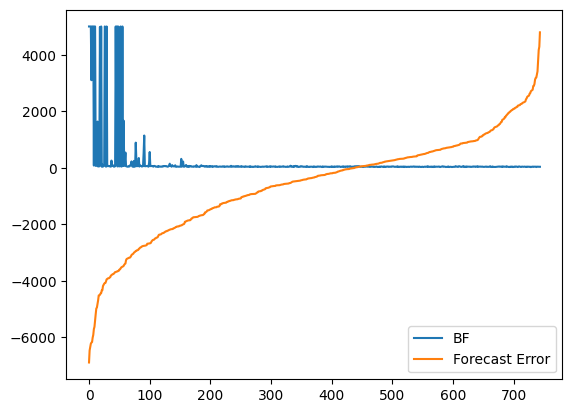

In [80]:
x = range(len(sorted_df))
plt.plot(x, sorted_df.BF, label='BF')
plt.plot(x, sorted_df.FsctError, label='Forecast Error')
plt.legend()

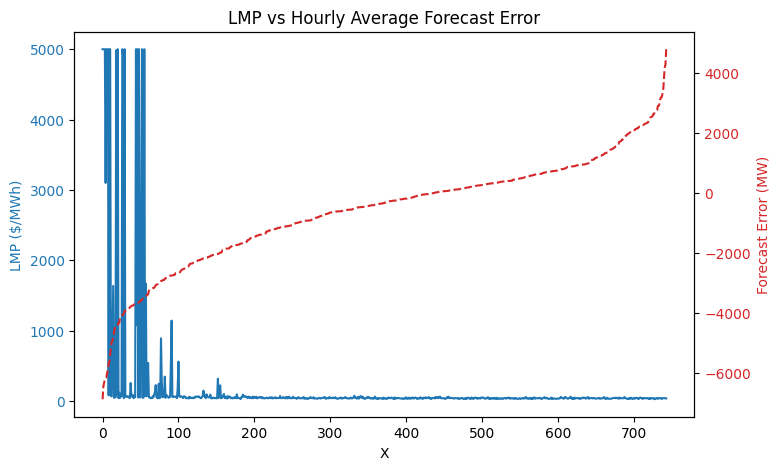

In [84]:
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the first line on ax1
ax1.plot(x, sorted_df.BF, label='BF', color='tab:blue')
ax1.set_xlabel('X')
ax1.set_ylabel('LMP ($/MWh)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
# ax1.set_yscale('log')
# Create the second axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second line on ax2
ax2.plot(x, sorted_df.FsctError, color='tab:red', label='MW', linestyle='--')
ax2.set_ylabel('Forecast Error (MW)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('LMP vs Hourly Average Forecast Error')
plt.show()

In [90]:
gen_file = os.path.join(res_dir,'Gen_commit.csv')
gen_df = pd.read_csv(gen_file)
gen_df.ramp10.sum()

9810.19995

## Analyze solar/wind statistics vs history data

In [5]:
datadir = '/Users/hanshu/Desktop/Price_formation/Data/time_series/NYISO_Hour'
hour_load = get_history_data(datadir, 'load')
hour_wind = get_history_data(datadir, 'wind')
hour_solar = get_history_data(datadir, 'solar')
time_idx = get_time_idx(datadir, 'load')
df = pd.DataFrame({'time': time_idx, 'load': hour_load, 'wind': hour_wind, 'solar': hour_solar})

mindatadir = '/Users/hanshu/Desktop/Price_formation/Data/time_series/NYISO_Min5'
min_load = get_history_data(mindatadir, 'load')
min_wind = get_history_data(mindatadir, 'wind')
min_solar = get_history_data(mindatadir, 'solar')

In [34]:
# nyiso statistics is from https://www.nyiso.com/documents/20142/11452204/2019%20NYCA%20Renewables%20Presentation%20FINAL.pdf/051c94d2-026a-fbd6-b7ad-ee1a2dc8a3d7
nyiso_wind_gen = [499, 459, 487, 435, 307, 297, 208, 215, 269, 392, 381, 504] # GWh
nyiso_solar_gen = [60, 83, 139, 154, 174, 200, 219, 205, 170, 109, 86, 54] # GWh
days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
nyiso_wind_cap = 1985 # MW
nyiso_solar_cap = 1766 # MW
# nyiso_wind_cap_factor = [w*1000/(nyiso_wind_cap*d*24) for (d,w) in zip(days, nyiso_wind_gen)]
# nyiso_solar_cap_factor = [s*1000/(nyiso_solar_cap*d*24) for (d,s) in zip(days, nyiso_solar_gen)]
nyiso_wind_cap_factor = [35, 34, 33, 30, 21, 21, 14, 15, 19, 27, 27, 34]
nyiso_solar_cap_factor = [6, 8, 12, 14, 15, 18, 18, 17, 14, 9, 7, 4]

In [50]:
PERFORM_wind_gen = []
PERFORM_solar_gen = []
for i in range(12):
    month = f'{i+1:02}'
    month_df = df[df.time.str.contains(f'2019-{month}')]
    PERFORM_wind_gen.append((month_df.wind.sum(), len(month_df)))
    PERFORM_solar_gen.append((month_df.solar.sum(), len(month_df)))

# CF = total generation / (capacity * hours) => capacity = total generation / (CF * hours)
PERFORM_wind_cap_month = [ w*100 / (cap_factor * hours) for (cap_factor, (w, hours)) in zip(nyiso_wind_cap_factor, PERFORM_wind_gen)]
PERFORM_solar_cap_month = [ s*100 / (cap_factor * hours) for (cap_factor, (s, hours)) in zip(nyiso_solar_cap_factor, PERFORM_solar_gen)]

PERFORM_wind_cap = np.median(PERFORM_wind_cap_month)
PERFORM_solar_cap = np.median(PERFORM_solar_cap_month)

In [51]:
PERFORM_wind_cap_facotr = [round(w*100/(PERFORM_wind_cap*hours),1) for (w, hours) in PERFORM_wind_gen]
PERFORM_solar_cap_facotr = [round(s*100/(PERFORM_solar_cap*hours),1) for (s, hours) in PERFORM_solar_gen]

In [57]:
PERFORM_wind_cap, PERFORM_solar_cap

(3498.5908261318227, 766.2449595518858)

In [55]:
cap_df = pd.DataFrame({'month': range(1, 13), 'nyiso wind CF %':nyiso_wind_cap_factor, 'wind capacity (MW)': PERFORM_wind_cap_month, 'PERFORM wind capacity facotr':PERFORM_wind_cap_facotr, 'nyiso solar CF %':nyiso_solar_cap_factor, 'solar capacity (MW)': PERFORM_solar_cap_month, 'PERFORM solar CF %':PERFORM_solar_cap_facotr})
cap_df

,month,nyiso wind CF %,wind capacity (MW),PERFORM wind capacity facotr,nyiso solar CF %,solar capacity (MW),PERFORM solar CF %
0,1,35,3243.638004,32.4,6,1064.934340,8.3
1,2,34,3169.516884,30.8,8,1079.901544,11.3
2,3,33,3217.165210,30.3,12,902.462922,14.1
3,4,30,3359.710981,28.8,14,630.665102,11.5
4,5,21,3576.966062,21.5,15,596.228995,11.7
5,6,21,3580.512261,21.5,18,593.250709,13.9
6,7,14,4243.725636,17.0,18,646.030351,15.2
7,8,15,4030.355808,17.3,17,662.512370,14.7
8,9,19,3821.582052,20.8,14,746.883786,13.6
9,10,27,3420.215591,26.4,9,785.606133,9.2


In [13]:
res = [i/(nyiso_wind_cap*1.7*d*24) for (d, i) in zip(days, PERFORM_wind_gen)]
res

[0.33642711554830024,
 0.31934678930168303,
 0.3146138744444717,
 0.29868522573652106,
 0.22259975491237502,
 0.2228204399787865,
 0.17606210966547098,
 0.17915346605927615,
 0.2151727929623464,
 0.27365778914175665,
 0.3063513530866406,
 0.31008831535408843]

In [10]:
nyiso_wind_cap_factor

[0.3378835892852306,
 0.3440985966174883,
 0.32975813222827116,
 0.3043660789252729,
 0.20787627637387937,
 0.20780856423173805,
 0.14084125565396388,
 0.1455811056038569,
 0.1882171844388469,
 0.26543159719400883,
 0.2665827036104114,
 0.3412691963922971]

In [11]:
PERFORM_wind_gen

[844643.3362547979,
 724171.2176150117,
 789878.4023687751,
 725697.571858481,
 558865.1774761463,
 541373.4537900588,
 442026.4622652021,
 449787.7081854684,
 522792.4246930353,
 687052.9078373902,
 744323.5015134254,
 778516.4070008043]

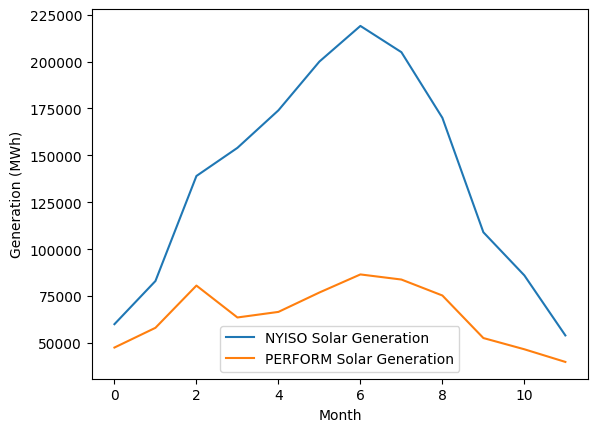

In [38]:
# plt.plot([x * 1000 for x in nyiso_wind_gen], label='NYISO Wind Generation')
# plt.plot(PERFORM_wind_gen, label='PERFORM Wind Generation')
# plt.xlabel('Month')
# plt.ylabel('Generation (MWh)')                                  
# plt.legend()

plt.plot([x * 1000 for x in nyiso_solar_gen], label='NYISO Solar Generation')
plt.plot(PERFORM_solar_gen, label='PERFORM Solar Generation')
plt.xlabel('Month')
plt.ylabel('Generation (MWh)')                                  
plt.legend()

In [34]:
correlation = np.corrcoef([x * 1000 for x in nyiso_solar_gen], PERFORM_solar_gen)
print(correlation)

[[1.         0.91238209]
 [0.91238209 1.        ]]


In [2]:
datadir = '/Users/hanshu/Desktop/Price_formation/Data/time_series/NYISO_Hour'
loadfile = parse_filepath(datadir, 'load')
solarfile = parse_filepath(datadir, 'solar')
windfile = parse_filepath(datadir, 'wind')

true_netload = []
fcst_meannetload = []
fcst_worstnetload = []

with h5py.File(loadfile, 'r') as load_h5, \
    h5py.File(solarfile, 'r') as solar_h5, \
    h5py.File(windfile, 'r') as wind_h5:
    keys = list(load_h5.keys())
    for i, key in enumerate(keys):
        if key == '2019-02-01T00:00:00':
            break
        load = load_h5[key][:]
        solar = solar_h5[key][:]
        wind = wind_h5[key][:]
        netload = load - solar - wind
        true_netload.append(netload[0][0])
        mean_netload = netload.mean(axis = 0)
        worst_idx = np.argmax(netload, axis = 0)
        for j in range(36):
            if len(fcst_worstnetload) < i + j + 1:
                fcst_worstnetload.append([])
                fcst_meannetload.append([])
            fcst_worstnetload[i+j].append(netload[worst_idx[j+1]][j+1])
            fcst_meannetload[i+j].append(mean_netload[j+1])

In [34]:
bias_amount = [[] for _ in range(len(fcst_meannetload))]
for i in range(len(fcst_meannetload)):
    for j in range(len(fcst_meannetload[i])):
        bias_amount[i].append(fcst_worstnetload[i][j] - fcst_meannetload[i][j])

In [35]:
total_bias = [0] * 36
for j in range(len(bias_amount)):
    if len(bias_amount[j]) < 36:
        continue
    for i, val in enumerate(reversed(bias_amount[j])):
        total_bias[i] += val

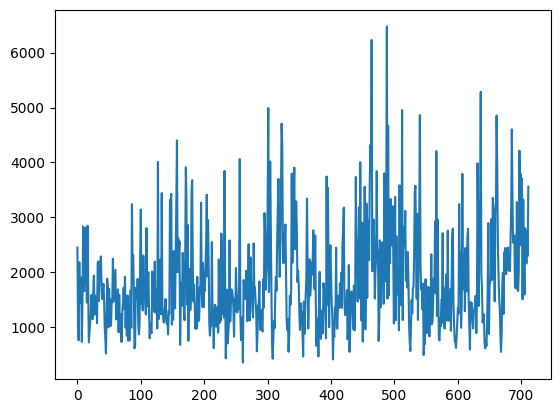

In [42]:
bias = [bias_amount[i][35] for i in range(len(bias_amount)) if len(bias_amount[i]) == 36]
plt.plot(bias)


In [5]:
hydro_df = pd.read_csv("/Users/hanshu/Desktop/Price_formation/Data/NYGrid/hydro_2019.csv")
hydro_df.describe().round(2)

,Gen_MW
count,105407.00
mean,3338.39
std,507.13
min,1463.00
25%,3019.00
50%,3411.00
75%,3713.00
max,4738.00


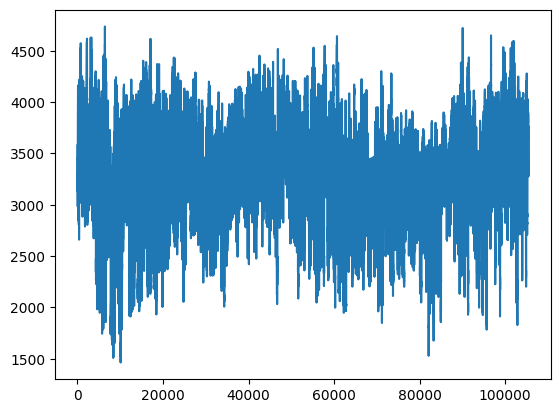

In [4]:
plt.plot(hydro_df['Gen_MW'])

In [32]:
keys[0] == '2018-12-31T21:00:00'

True

In [23]:
bias_amount[9]

[714.6364368574832,
 1468.5581007750461,
 144.8668428458477,
 592.506432560871,
 567.8110315703434,
 1155.1515745372672,
 1797.6766186097757,
 906.8625674648756,
 -177.85038195633388,
 -1311.092175304726]

15170.87810216659
16617.881535123655
15792.88004957454
15756.216415704339
17347.69348258144
15159.644245710102
14753.374779389364
14766.12174263422
15834.959940670784
14085.219129394103
15946.041853379003
16014.155621435126


In [16]:
np.argmax(netload, axis = 0)

array([ 0,  4,  4,  4,  4,  4, 10, 10, 10, 10,  6,  2,  4,  2,  8,  4,  7,
        4,  7,  4,  7,  5,  8,  8,  2,  5,  5,  6,  2,  2, 10, 10,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  5,  2,  4,  4,  0,  4])

In [13]:
np.argmax(npnetload, axis = 0)

array([ 0,  4,  4,  4,  4,  4, 10, 10, 10, 10,  6,  2,  4,  2,  8,  4,  7,
        4,  7,  4,  7,  5,  8,  8,  2,  5,  5,  6,  2,  2, 10, 10,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  5,  2,  4,  4,  0,  4])

In [22]:
data = []
i = 0
with h5py.File(file_path, 'r') as h5_file:
    keys = list(h5_file.keys())
    for key in keys:
        matrix = h5_file[key][:]
        mean_forecast = matrix.mean(axis = 0)
        for j in range(36):
            if len(data) < i + j + 1:
                data.append([])
            data[i+j].append(mean_forecast[j+1])
        i += 1

[17501.58872083275]

In [9]:
offset = 4*12
print('Total wind in 31 days:', sum(min_wind[offset:offset+12*24*31])/12)
print('Total solar in 31 days:', sum(min_solar[offset:offset+12*24*31])/12)

Total wind in 31 days: 844854.6766405235
Total solar in 31 days: 47538.66893807036


In [3]:
24*31

744

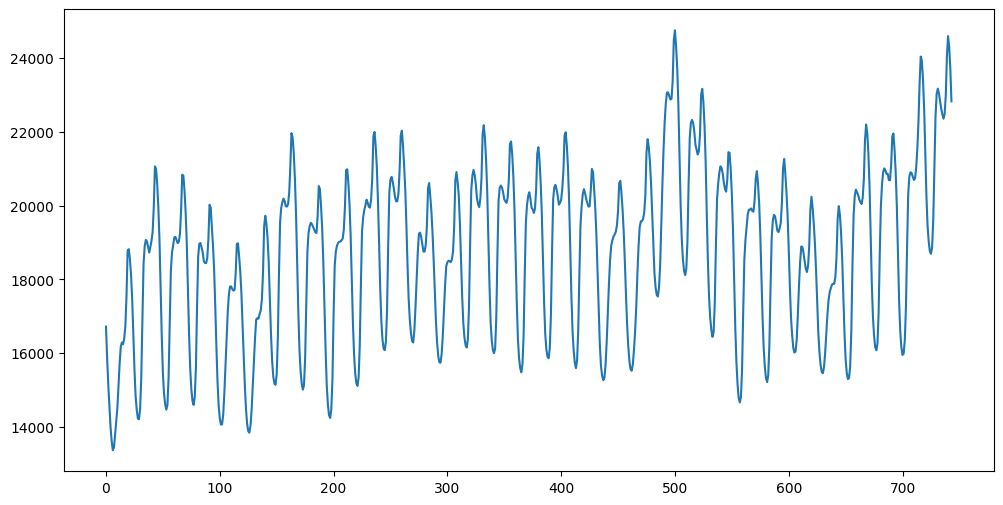

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(hour_load[3:3+31*24], label='Load')

In [3]:
def get_gencommitment(res_dir, rundate, policy):
    file = os.path.join(res_dir, rundate, f'{policy}/{policy}_{rundate}/UC_2019-01-01.json')
    gen_commit = {}
    with open(file, 'r') as f:
        data = json.load(f)
        commitment = data['Commitment status']
        # startup = data['Start up']
        # shutdown = data['Shut down']
    return commitment

def get_nocommitment(res_dir, rundate, policy):
    file = os.path.join(res_dir, rundate, f'{policy}/{policy}_{rundate}/UC_2019-01-01.json')
    nocommitment = []
    with open(file, 'r') as f:
        data = json.load(f)
        commitment = data['Commitment status']
    for key in commitment.keys():
        if sum(commitment[key]) == 0:
            nocommitment.append(key)
    return nocommitment

def get_nostartshut(res_dir, rundate, policy):
    file = os.path.join(res_dir, rundate, f'{policy}/{policy}_{rundate}/UC_2019-01-01.json')
    nostartup = []
    noshutdown = []
    with open(file, 'r') as f:
        data = json.load(f)
        startup = data['Start up']
        shutdown = data['Shut down']
    for key in startup.keys():
        if sum(startup[key]) == 0:
            nostartup.append(key)
    for key in shutdown.keys():
        if sum(shutdown[key]) == 0:
            noshutdown.append(key)
    return nostartup, noshutdown

def get_prices(res_dir, rundate, policy):
    file = os.path.join(res_dir, rundate, f'{policy}/{policy}_{rundate}/UC_2019-01-01.json')
    with open(file, 'r') as f:
        data = json.load(f)
        LMP = data['Hourly average LMP']
        res_60T = data['Hourly average reserve price 60Total']
        res_10S = data['Hourly average reserve price 10Spin']
        res_10T = data['Hourly average reserve price 10Total']
        res_30T = data['Hourly average reserve price 30Total']
    return LMP, res_10S, res_10T, res_30T, res_60T

In [10]:
gen_df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Result/Gen_commit.csv')

In [23]:
res_dir = '/Users/hanshu/Desktop/Price_formation/Result'
rundate = datetime(2024, 11, 19).strftime('%Y-%m-%d')
policy = 'PF'
commit = get_gencommitment(res_dir, rundate, policy)
ramp_5 = []
for i in range(len(commit['Gowanus 2-5'])):
    val = 0
    for g in commit.keys():
        if commit[g][i] != 0:
            g_ramp10 = gen_df[gen_df['Gen'] == g]['ramp10'].values[0]
            val += g_ramp10/2
    ramp_5.append(val)
            

min_netload = [min_load[i] - min_wind[i] - min_solar[i] for i in range(len(min_load))]
min_delta_netload = [min_netload[i] - min_netload[i-1] for i in range(1, len(min_netload))]

In [25]:
ramp_5_5min = []
for  i in range(len(ramp_5)):
    if i == 0:
        ramp_5_5min.extend([ramp_5[i]]*11)
    else:
        ramp_5_5min.extend([ramp_5[i]]*12)

In [28]:
ramp_5_5min = np.array(ramp_5_5min)
min_delta_netload = np.array(min_delta_netload)
ramp_5_5min - min_delta_netload[:len(ramp_5_5min)]

array([2000.15834156, 1971.10444547, 2008.66540445, ..., 2571.19281963,
       2541.65438252, 2693.84591985])

In [29]:
min(ramp_5_5min)

1794.683535

In [16]:
res_dir = '/Users/hanshu/Desktop/Price_formation/Result'
rundate = datetime(2024, 11, 11).strftime('%Y-%m-%d')
policy = 'MF'
commit = get_gencommitment(res_dir, rundate, policy)
commit

{'Gowanus 2-5': 0,
 'Holtsville 04': 0,
 'Barrett ST 02': 0,
 'Holtsville 03': 0,
 'Gowanus 2-3': 0,
 'Batavia': 0,
 'Gowanus 1-5': 0,
 'Gowanus 2-8': 0,
 'Gowanus 3-1': 0,
 'Gowanus 3-2': 0,
 'Hellgate 1': 744,
 'Jamestown 7': 33,
 'Port Jefferson GT 03': 744,
 'Narrows 2-3': 0,
 'Astoria GT 01': 0,
 'Caithness_CC_1': 338,
 'Glenwood GT 02': 0,
 'West Babylon 4': 0,
 'Glenwood GT 05': 220,
 'Holtsville 06': 0,
 'Jamestown 6': 0,
 'Oswego 6': 0,
 'Gowanus 1-1': 0,
 'Gowanus 3-6': 0,
 'Narrows 1-7': 0,
 'Nassau Energy Corporation': 0,
 'Narrows 1-2': 0,
 'Astoria Energy 2 - CC3': 382,
 'EMPIRE_CC_1': 744,
 'Narrows 1-5': 0,
 'Astoria GT 4-2': 744,
 'Gowanus 2-1': 0,
 'General Mills Inc': 0,
 'Gowanus 4-4': 0,
 'Holtsville 07': 0,
 'Narrows 1-4': 0,
 'Glenwood GT 04': 220,
 'Burrstone Engy Center, LLC LU': 707,
 'Astoria GT 4-4': 576,
 'Port Jefferson GT 02': 744,
 'Hellgate 2': 744,
 'Gowanus 4-5': 0,
 'Astoria GT 2-4': 744,
 'Gowanus 4-8': 0,
 'Rensselaer': 400,
 'Freeport 1-4': 0,
 'C

In [28]:
name = 'load'
file_path = os.path.join(datadir, name + '_scenarios.h5')
with h5py.File(file_path, 'r') as h5_file:
    keys = list(h5_file.keys())
    for i in range(3):
        x = np.mean(h5_file[keys[i]][1:, :], axis=0)
        y = h5_file[keys[i]][0, :]
        print(x.shape)
        print(y - x)
        print(x)

(48,)
[    0.          -910.20327739 -1308.07146671  -548.8458606
  -511.83275281  -386.76726814  -764.83305628  -337.56435215
  -928.35757179 -1274.90173867  -960.33180743 -1940.12709641
 -2072.7276063  -2140.71317421 -3660.13522484 -3520.18011098
 -3442.63404244 -2885.33073966 -3313.94181126 -3292.7081049
 -3039.26871904 -2367.17361594 -1761.72816041 -2296.45216477
 -2341.37633417 -2326.58247628 -1104.85213808  -770.85947118
  -505.84506892  -319.61128199  -414.35213834  -497.62290315
  -448.16530918  -450.28816264  -194.24258399   -11.62966761
   439.70347802   238.74739969   568.81773762  -137.69096213
  -113.17552965   -68.49399161   -29.20762134   232.46242716
   225.53478694  -346.94826213  1296.31106507   857.45960635]
[18976.28320312 19195.68569926 18814.37029483 17263.67203248
 16381.624745   15522.63445564 15317.52446253 14325.2479459
 14529.13198586 15002.26273867 15582.51780743 16373.40909641
 18155.7226063  18526.33517421 18971.66722484 19243.48870473
 19617.36841744 1887

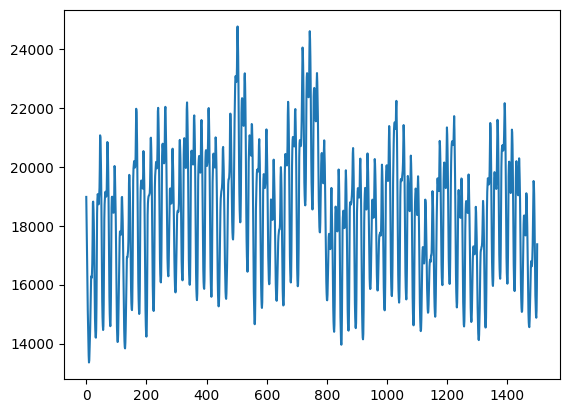

In [10]:
plt.plot(hour_load[:1500], label='load')

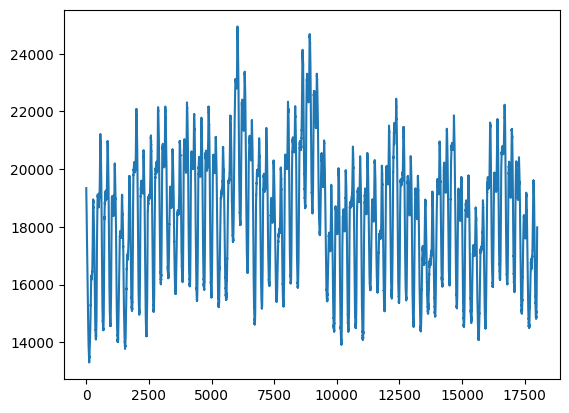

In [14]:
plt.plot(min_load[:1500*12], label='load')

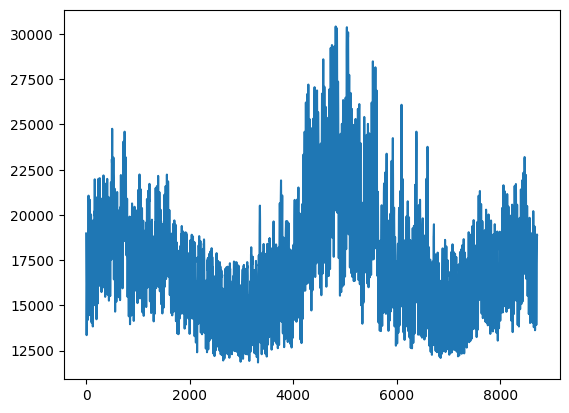

In [15]:
plt.plot(hour_load, label='load')

In [2]:
genfile = '/Users/hanshu/Desktop/Price_formation/Data/NYGrid/NY_gen.csv'
gen_df = pd.read_csv(genfile, index_col=0)
gen_df[gen_df.GEN_NAME == 'Brooklyn Navy Yard']

,GEN_NAME,PMAX,PMIN,RAMP_10,GEN_FUEL,PRIMEMOVER,Energy_Source_1 (Fuel),RAMP_min,StartUpCost,SimGEN_PERCidx,PERC_StartUpCost,MinDownTime,MinRunTime
Unnamed: 0,,,,,,,,,,,,,
57,Brooklyn Navy Yard,240.0,101.0,15.916667,Combined Cycle,CC,NG,1.591667,20000.0,198,19448.0,4.0,6.0


In [3]:
import pandas as pd
gen_df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Result//Gen_commit.csv')
# off_gen = gen_df[gen_df.commitment == False]
# on_gen = gen_df[gen_df.commitment == True]
gen_df[gen_df['Gen'] == 'CPV_VALLEY___CC2']

,Gen,ramp10,ramp30,pg_min,pg_max,fixed_cost,startup_cost,variable_cost,minup,mindown,time_limits,commitment
202,CPV_VALLEY___CC2,32.833,98.5,221.0,362.0,-540.81,19448.0,31.09,2.0,6.0,6.0,True


In [11]:
on_gen.describe().round(2)

,pg_min,pg_max,fixed_cost,startup_cost,variable_cost,minup,mindown,time_limits
count,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00
mean,26.02,140.94,-28.03,4125.51,138.42,325.99,326.62,326.62
std,55.70,235.37,1446.30,8651.51,99.68,1659.18,1659.05,1659.05
min,0.00,0.10,-10127.00,0.00,1.20,1.00,0.00,0.00
25%,0.00,20.00,0.00,0.00,36.71,1.00,0.00,0.00
50%,0.00,43.00,0.00,0.00,110.12,1.00,0.00,0.00
75%,17.38,133.25,0.00,3766.98,236.21,2.00,4.00,4.00
max,271.00,1299.00,4739.00,61627.07,390.46,8760.00,8760.00,8760.00


In [12]:
off_gen.describe().round(2) 

,pg_min,pg_max,fixed_cost,startup_cost,variable_cost,minup,mindown,time_limits
count,71.00,71.00,71.00,71.00,71.00,71.00,71.00,71.00
mean,13.72,136.07,784.14,11066.69,138.51,1.56,2.38,2.38
std,24.11,225.22,1866.17,18626.94,92.70,0.50,2.07,2.07
min,0.00,2.00,-957.28,0.00,30.40,1.00,0.00,0.00
25%,0.00,18.30,0.00,2520.42,58.90,1.00,0.00,0.00
50%,1.00,43.00,26.64,2633.36,95.43,2.00,4.00,4.00
75%,15.00,98.00,450.84,19448.00,236.21,2.00,4.00,4.00
max,111.00,1000.00,8873.70,98278.00,309.90,2.00,6.00,6.00
